In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import *
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates


In [46]:
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import *
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#!pip install pandas --upgrade
import math
import sys
%matplotlib inline
sns.set()
sys.path.append('../method/')
import dataset as ds
import preprocessing as pp
import machine_algorithm as ma

In [47]:
train_name = "/Users/e185716/グラフ練習2/クロス/ei_100_train.csv"
test_name = "/Users/e185716/グラフ練習2/クロス/ei_100_test.csv"
# train_nan_train.csv"
# test_name = "/Users/e185716/グラフ練習2/クロス/ei_error_min_train.csv"me = "/Users/e185716/グラフ練習2/クロス/ei_error_mi


In [48]:
d_train = ds.load_data("/Users/e185716/研究/R/ei_make/event_train.csv")
d_test = ds.load_data("/Users/e185716/研究/R/ei_make/event_test.csv")
date_data = d_test["date"]
d_train['date'] = pd.to_datetime(d_train['date'])
d_test['date'] = pd.to_datetime(d_test['date'])
# 'date_column'列をインデックスとして設定
d_train.set_index('date', inplace=True)
d_test.set_index('date', inplace=True)

In [16]:
d_test

,salesTotal,CustNum,kankou,tabelog,day1_sales,day1_kankou,day1_tabelog,event_impact,GW,お盆,イベント,クリスマス,三連休,交通規制,元日,台風,大晦日,祝日,雨
date,,,,,,,,,,,,,,,,,,,
2019-07-08,553520.0,236.0,1141.0,670.0,759570.0,876.0,570.0,0,0,0,0,0,0,0,0,0,0,0,0
2019-07-09,356740.0,133.0,876.0,429.0,553520.0,984.0,670.0,0,0,0,0,0,0,0,0,0,0,0,0
2019-07-10,372840.0,132.0,984.0,414.0,356740.0,1216.0,429.0,0,0,0,0,0,0,0,0,0,0,0,0
2019-07-11,283870.0,118.0,1216.0,376.0,372840.0,2140.0,414.0,-5,0,0,0,0,0,0,0,0,0,0,1
2019-07-12,563930.0,232.0,2140.0,463.0,283870.0,9916.0,376.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-28,560978.0,253.0,6683.0,318.0,602772.0,4156.0,343.0,-5,0,0,0,0,0,0,0,0,0,0,1
2020-03-29,652850.0,276.0,4156.0,214.0,560978.0,3157.0,318.0,-5,0,0,0,0,0,0,0,0,0,0,1
2020-03-30,459392.0,206.0,3157.0,230.0,652850.0,3158.0,214.0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
d_train[320:370]

,salesTotal,CustNum,kankou,tabelog,day1_sales,day1_kankou,day1_tabelog,event_impact,GW,お盆,イベント,クリスマス,三連休,交通規制,元日,台風,大晦日,祝日,雨
date,,,,,,,,,,,,,,,,,,,
2018-05-24,365240.0,152.0,1722.0,628.0,312470.0,2040.0,483.0,0,0,0,0,0,0,0,0,0,0,0,0
2018-05-25,478810.0,377.0,2040.0,492.0,365240.0,4586.0,628.0,0,0,0,0,0,0,0,0,0,0,0,0
2018-05-26,859080.0,370.0,4586.0,481.0,478810.0,3174.0,492.0,0,0,0,0,0,0,0,0,0,0,0,0
2018-05-27,1000660.0,465.0,3174.0,587.0,859080.0,1991.0,481.0,0,0,0,0,0,0,0,0,0,0,0,0
2018-05-28,636720.0,252.0,1991.0,755.0,1000660.0,1894.0,587.0,0,0,0,0,0,0,0,0,0,0,0,0
2018-05-29,361740.0,168.0,1894.0,530.0,636720.0,1384.0,755.0,0,0,0,0,0,0,0,0,0,0,0,0
2018-05-30,345310.0,140.0,1384.0,467.0,361740.0,1785.0,530.0,-5,0,0,0,0,0,0,0,0,0,0,1
2018-05-31,368780.0,163.0,1785.0,497.0,345310.0,3138.0,467.0,0,0,0,0,0,0,0,0,0,0,0,0
2018-06-01,20640.0,8.0,3138.0,478.0,368780.0,4559.0,497.0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
d_train = ds.load_data(train_name)
d_train


,Unnamed: 0,date,salesTotal,CustNum,kankou,tabelog,day1_sales,day1_kankou,day1_tabelog,event_impact,...,お盆,イベント,クリスマス,三連休,交通規制,元日,台風,大晦日,祝日,雨
0,1,2017-07-08,743628,334,3979.0,932,NaN,2146.0,NaN,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,2,2017-07-09,888732,393,2146.0,769,743628.0,1418.0,932.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,3,2017-07-10,441044,220,1418.0,602,888732.0,1611.0,769.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,4,2017-07-11,413247,196,1611.0,780,441044.0,1646.0,602.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,5,2017-07-12,347005,152,1646.0,841,413247.0,1678.0,780.0,2.398426,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-07-03,283110,112,1324.0,366,522450.0,1307.0,363.0,2.398426,...,0,0,0,0,0,0,0,0,0,1
726,727,2019-07-04,244460,92,1307.0,643,283110.0,1178.0,366.0,2.398426,...,0,0,0,0,0,0,0,0,0,1
727,728,2019-07-05,388490,172,1178.0,322,244460.0,5244.0,643.0,2.398426,...,0,0,0,0,0,0,0,0,0,1
728,729,2019-07-06,628560,230,5244.0,338,388490.0,2002.0,322.0,2.398426,...,0,0,0,0,0,0,0,0,0,1


In [50]:
use_vector = ["CustNum", "day1_sales", "day1_kankou", "day1_tabelog", "event_impact"]
FV1 = ["CustNum","event_impact"]
FV2 = ["CustNum","day1_sales","event_impact"]
FV3 = ["CustNum","day1_sales","day1_kankou","event_impact"]
FV4 = ["CustNum","day1_sales","day1_kankou","day1_tabelog","event_impact"]

In [51]:
use_vector = FV4

In [16]:
d_train = d_train.loc[:,use_vector]
d_test = d_test.loc[:,use_vector]

In [18]:
d_train = d_train.drop(columns=["event_impact"])
d_test = d_test.drop(columns=["event_impact"])

In [193]:

lgb_train = lgb.Dataset(d_train.drop(columns=["CustNum"]), label=d_train["CustNum"])
lgb_eval = lgb.Dataset(d_test.drop(columns=["CustNum"]), label=d_test["CustNum"], reference=lgb_train)

params = {
    'device': 'gpu',
    'task' : 'train',
    'boosting':'gbdt',
    'objective' : 'regression',
    'metric' : {'mse'},
    'num_leaves':78,
    'drop_rate':0.05,
    'learning_rate':0.01,
    'seed':0,
    'verbose':0,
    'device': 'cpu'
    }

evaluation_results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100000,
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['Train', 'Valid'],
                evals_result=evaluation_results,
                early_stopping_rounds=1000,
                verbose_eval=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 1000 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [194]:
y_pred = gbm.predict(d_test.drop(columns=["CustNum"]), num_iteration=gbm.best_iteration)

In [195]:
lgbm_result= pd.DataFrame(y_pred, columns=["pred"])
lgbm_result = lgbm_result

In [ ]:
lgbm_result["date"] = date_data
lgbm_result['date'] = pd.to_datetime(lgbm_result['date'])
# 'date_column'列をインデックスとして設定
lgbm_result.set_index('date', inplace=True)

# LightGBM　各イベントで特徴ベクトルの組み合わせごとに予測

In [52]:
ei_step_num = ["non", 0, 100, "error_min"]
FV1 = ["CustNum","event_impact"]
FV2 = ["CustNum","day1_sales","event_impact"]
FV3 = ["CustNum","day1_sales","day1_kankou","event_impact"]
FV4 = ["CustNum","day1_sales","day1_kankou","day1_tabelog","event_impact"]

In [53]:
def lgbm_pred(fv):
    result_list = [] # plotlist[#1][#2] #1が期間、#2がイベントインパクト
    for ei_step in ei_step_num:
        if ei_step == "non":
            original_train = ds.load_data("/Users/e185716/研究/R/ei_make/event_train.csv")
            original_test = ds.load_data("/Users/e185716/研究/R/ei_make/event_test.csv")
        elif ei_step == 0:
            original_train = ds.load_data("/Users/e185716/研究/R/ei_make/event_train.csv")
            original_test = ds.load_data("/Users/e185716/研究/R/ei_make/event_test.csv")
        else:
            train_name = "/Users/e185716/グラフ練習2/クロス/ei_" + str(ei_step) +  "_train.csv"
            test_name = "/Users/e185716/グラフ練習2/クロス/ei_" + str(ei_step) + "_test.csv"
            original_train = ds.load_data(train_name)
            original_test = ds.load_data(test_name)
            
        original_train['date'] = pd.to_datetime(original_train['date'])
        original_test['date'] = pd.to_datetime(original_test['date'])
        # 'date_column'列をインデックスとして設定
        original_train.set_index('date', inplace=True)
        original_test.set_index('date', inplace=True)
        
        d_train = original_train.loc[:,fv]
        d_test = original_test.loc[:,fv]
        
        if ei_step == "non":
            d_train = d_train.drop(columns=["event_impact"])
            d_test = d_test.drop(columns=["event_impact"])
                

        lgb_train = lgb.Dataset(d_train.drop(columns=["CustNum"]), label=d_train["CustNum"])
        lgb_eval = lgb.Dataset(d_test.drop(columns=["CustNum"]), label=d_test["CustNum"], reference=lgb_train)

        params = {
            'device': 'gpu',
            'task' : 'train',
            'boosting':'gbdt',
            'objective' : 'regression',
            'metric' : {'mse'},
            'num_leaves':78,
            'drop_rate':0.05,
            'learning_rate':0.01,
            'seed':0,
            'verbose':0,
            'device': 'cpu'
            }

        evaluation_results = {}
        gbm = lgb.train(params,
                        lgb_train,
                        num_boost_round=100000,
                        valid_sets=[lgb_train, lgb_eval],
                        valid_names=['Train', 'Valid'],
                        evals_result=evaluation_results,
                        early_stopping_rounds=1000,
                        verbose_eval=100)
        y_pred = gbm.predict(d_test.drop(columns=["CustNum"]), num_iteration=gbm.best_iteration)
        lgbm_result= pd.DataFrame(y_pred, columns=["pred"])
        lgbm_result["date"] = date_data
        lgbm_result['date'] = pd.to_datetime(lgbm_result['date'])
        # 'date_column'列をインデックスとして設定
        lgbm_result.set_index('date', inplace=True)
        result_list.append(lgbm_result)

        
    return result_list

In [54]:
fv1_pred = lgbm_pred(FV1)
fv2_pred = lgbm_pred(FV2)
fv3_pred = lgbm_pred(FV3)
fv4_pred = lgbm_pred(FV4)


[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 1000 rounds
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Wa

In [55]:
fv1_pred

[                  pred
 date                  
 2019-07-08  313.405479
 2019-07-09  313.405479
 2019-07-10  313.405479
 2019-07-11  313.405479
 2019-07-12  313.405479
 ...                ...
 2020-03-28  313.405479
 2020-03-29  313.405479
 2020-03-30  313.405479
 2020-03-31  313.405479
 2020-04-01  313.405479
 
 [269 rows x 1 columns],
                   pred
 date                  
 2019-07-08  312.691094
 2019-07-09  312.691094
 2019-07-10  312.691094
 2019-07-11  230.136564
 2019-07-12  312.691094
 ...                ...
 2020-03-28  230.136564
 2020-03-29  230.136564
 2020-03-30  312.691094
 2020-03-31  312.691094
 2020-04-01  312.691094
 
 [269 rows x 1 columns],
                   pred
 date                  
 2019-07-08  312.761633
 2019-07-09  312.761633
 2019-07-10  312.761633
 2019-07-11  240.811057
 2019-07-12  312.761633
 ...                ...
 2020-03-28  240.811057
 2020-03-29  240.811057
 2020-03-30  312.761633
 2020-03-31  312.761633
 2020-04-01  312.761633
 
 [269 ro

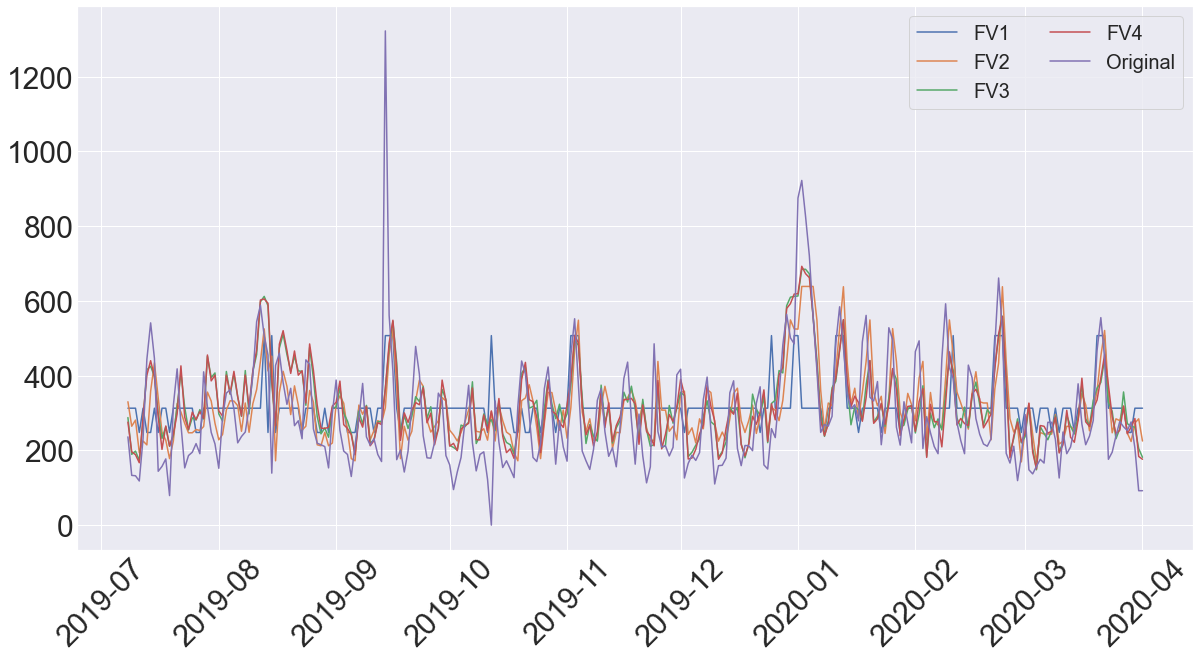

In [65]:
import datetime
import os


FV_list = ["FV1","FV2","FV3","FV4"]
ei = ei_step_num[3]
if ei == "non":
    ei_step = 0
elif ei == "error_min":
    ei_step = 3
elif ei == 0:
    ei_step = 1
else:
    ei_step = 2
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(fv1_pred[ei_step], label='FV1')
plt.plot(fv2_pred[ei_step], label='FV2')
plt.plot(fv3_pred[ei_step], label='FV3')
plt.plot(fv4_pred[ei_step], label='FV4')

plt.plot(d_test["CustNum"],label='Original')
# # sxmin='2018-07-08'
# # sxmax='2020-03-12'

# # xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# # xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# # plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)

# save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/LightGBM/"
save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/shinsayou/"

os.makedirs(save_dir_name, exist_ok=True)
save_file_name = save_dir_name + "ei_" + str(ei) + ".png"
fig.savefig(save_file_name,bbox_inches="tight")

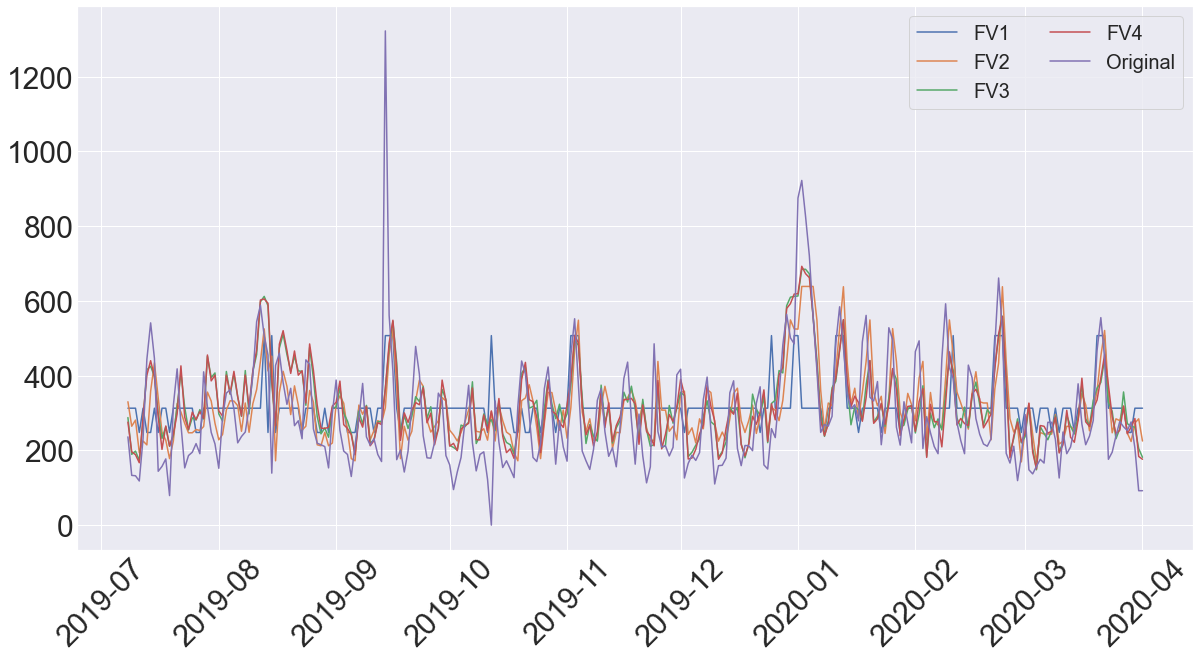

In [59]:
import datetime
import os


FV_list = ["FV1","FV2","FV3","FV4"]
ei = ei_step_num[3]
if ei == "num":
    ei_step = 0
elif ei == "error_min":
    ei_step = 3
elif ei == 1:
    ei_step = 0
else:
    ei_step = 2
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(fv1_pred[ei_step], label='FV1')
plt.plot(fv2_pred[ei_step], label='FV2')
plt.plot(fv3_pred[ei_step], label='FV3')
plt.plot(fv4_pred[ei_step], label='FV4')

plt.plot(d_test["CustNum"],label='Original')
# # sxmin='2018-07-08'
# # sxmax='2020-03-12'

# # xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# # xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# # plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)

save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/LightGBM/"
os.makedirs(save_dir_name, exist_ok=True)
save_file_name = save_dir_name + "ei_" + str(ei) + ".png"
fig.savefig(save_file_name,bbox_inches="tight")

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
def rmse_r2(result, fv):
    for ei_step in ei_step_num:
        if ei_step == "non":
            ei = 0
        elif ei_step == "error_min":
            ei = 3
        elif ei_step == 0:
            ei = 1
        else:
            ei = 2
        rmse = np.sqrt(mean_squared_error(d_test["CustNum"], result[ei]))
        r2 = r2_score(d_test["CustNum"], result[ei])
        print(fv + " : ei_" + str(ei_step) + " RMSE : " + str(round(rmse,3)))
        print(fv + " : ei_" + str(ei_step) + " 決定係数 : " + str(round(r2,3)))


In [14]:
rmse_r2(fv1_pred, "FV1")
rmse_r2(fv2_pred, "FV2")
rmse_r2(fv3_pred, "FV3")
rmse_r2(fv4_pred, "FV4")

FV1 : ei_non RMSE : 154.369
FV1 : ei_non 決定係数 : -0.019
FV1 : ei_0 RMSE : 135.829
FV1 : ei_0 決定係数 : 0.211
FV1 : ei_100 RMSE : 140.682
FV1 : ei_100 決定係数 : 0.154
FV1 : ei_error_min RMSE : 141.984
FV1 : ei_error_min 決定係数 : 0.138
FV2 : ei_non RMSE : 129.737
FV2 : ei_non 決定係数 : 0.28
FV2 : ei_0 RMSE : 119.173
FV2 : ei_0 決定係数 : 0.393
FV2 : ei_100 RMSE : 124.761
FV2 : ei_100 決定係数 : 0.335
FV2 : ei_error_min RMSE : 125.449
FV2 : ei_error_min 決定係数 : 0.327
FV3 : ei_non RMSE : 122.058
FV3 : ei_non 決定係数 : 0.363
FV3 : ei_0 RMSE : 113.32
FV3 : ei_0 決定係数 : 0.451
FV3 : ei_100 RMSE : 117.276
FV3 : ei_100 決定係数 : 0.412
FV3 : ei_error_min RMSE : 117.815
FV3 : ei_error_min 決定係数 : 0.407
FV4 : ei_non RMSE : 122.018
FV4 : ei_non 決定係数 : 0.364
FV4 : ei_0 RMSE : 113.697
FV4 : ei_0 決定係数 : 0.447
FV4 : ei_100 RMSE : 117.767
FV4 : ei_100 決定係数 : 0.407
FV4 : ei_error_min RMSE : 118.303
FV4 : ei_error_min 決定係数 : 0.402


# aaa


In [4]:
non_ei = ds.load_data("/Users/e185716/EI_1_-1/non_ei.csv")
one_minus_one = ds.load_data("/Users/e185716/EI_1_-1/one_minus_one.csv")
min_ei = ds.load_data("/Users/e185716/EI_1_-1/min_ei.csv")


In [5]:
non_ei['date'] = pd.to_datetime(non_ei['date'])
one_minus_one['date'] = pd.to_datetime(one_minus_one['date'])
min_ei['date'] = pd.to_datetime(min_ei['date'])
# 'date_column'列をインデックスとして設定
min_ei.set_index('date', inplace=True)
non_ei.set_index('date', inplace=True)
one_minus_one.set_index('date', inplace=True)

In [8]:
non_ei

,Unnamed: 0,prediction
date,,
2019-07-08,1,198.124610
2019-07-09,2,180.770226
2019-07-10,3,176.120413
2019-07-11,4,162.858212
2019-07-12,5,223.052399
...,...,...
2020-03-28,265,404.742864
2020-03-29,266,339.159514
2020-03-30,267,199.027641


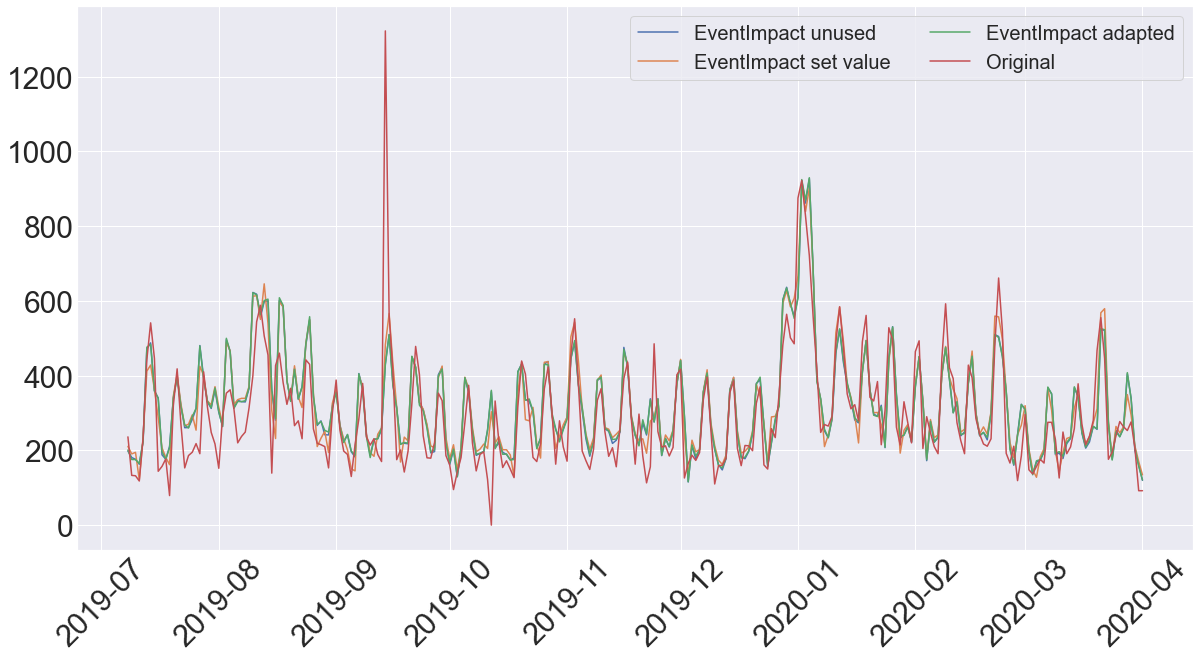

In [9]:
import datetime
import os


fig, ax = plt.subplots(figsize=(20, 10))

# plt.plot(arima_forecast,label='Original')
plt.plot(non_ei["prediction"],label='EventImpact unused')
plt.plot(one_minus_one["prediction"],label='EventImpact set value')
plt.plot(min_ei["prediction"],label='EventImpact adapted')


plt.plot(d_test["CustNum"],label='Original')
# # sxmin='2018-07-08'
# # sxmax='2020-03-12'

# # xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# # xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# # plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)

save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/"
os.makedirs(save_dir_name, exist_ok=True)
save_file_name = save_dir_name + "one_minus_one_result" + ".png"
fig.savefig(save_file_name,bbox_inches="tight")

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
rmse = np.sqrt(mean_squared_error(d_test["CustNum"], min_ei["prediction"]))
# 決定係数の計算
r2 = r2_score(d_test["CustNum"], min_ei["prediction"])
print("RMSE : " + str(rmse))
print("決定係数 : " + str(r2))


RMSE : 98.47224699945454
決定係数 : 0.5854767101885836
